In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns


path =r'D:\Machine Learning by cellula\Task3\Mohamed_Hefny_Task3\first inten project.csv'
data=pd.read_csv(path)

data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

# Check for null and white space

In [2]:
x = data.isnull()   #data nulling
print(x.sum())
print(data.dtypes)  #data types
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)    #white spacing
data = data.drop('Booking_ID', axis=1)  #removing Booking_ID data
data.describe() #describing data

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64
Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average p

number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.000000           0.000000      0.000000      0.000000   
25%                 1.000000           0.000000     17.000000      0.000000   
50%                 2.000000           0.000000     57.000000      0.000000   
75%                 3.000000           0.000000    126.000000      0.000000   
max                17.000000           1.000000    443.000000      1.000000   

                P-C       P-not-C  average price   special requests  
count  36285.000000  36285.000000    36285.000000      36285.000000  
mean       0.023343      0.153369      103.421636          0.619733  
std        0.368281      1.753931       35.086469          0.786262  
min        0.000000      0.000000        0.000000          0.000000  
25%        0.000000      0.000000       80.300000          0.000000  
50%        0.000000      0.000000       99.450000          0.000000  
75%        0.000000      0.000000      120.000000          1.000000  
max       13.000000     58.000000      540.000000          5.000000

# Encoding type of meal , room type , market segment type 

In [3]:
categorical_columns = ['type of meal', 'room type', 'market segment type']
data = pd.get_dummies(data, columns=categorical_columns)

data.head()

number of adults  number of children  number of weekend nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number of week nights  car parking space  lead time  repeated  P-C  \
0                      5                  0        224         0    0   
1                      3                  0          5         0    0   
2                      3                  0          1         0    0   
3                      2                  0        211         0    0   
4                      2                  0         48         0    0   

   P-not-C  average price   ...  room type_Room_Type 3 room type_Room_Type 4  \
0        0           88.00  ...                  False                 False   
1        0          106.68  ...                  False                 False   
2        0           50.00  ...                  False                 False   
3        0          100.00  ...                  False                 False   
4        0           77.00  ...                  False                 False   

  room type_Room_Type 5  room type_Room_Type 6  room type_Room_Type 7  \
0                 False                  False                  False   
1                 False                  False                  False   
2                 False                  False                  False   
3                 False                  False                  False   
4                 False                  False                  False   

   market segment type_Aviation  market segment type_Complementary  \
0                         False                              False   
1                         False                              False   
2                         False                              False   
3                         False                              False   
4                         False                              False   

   market segment type_Corporate  market segment type_Offline  \
0                          False                         True   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   market segment type_Online  
0                       False  
1                        True  
2                        True  
3                        True  
4                        True  

[5 rows x 29 columns]

# Plotting data before removing outliers

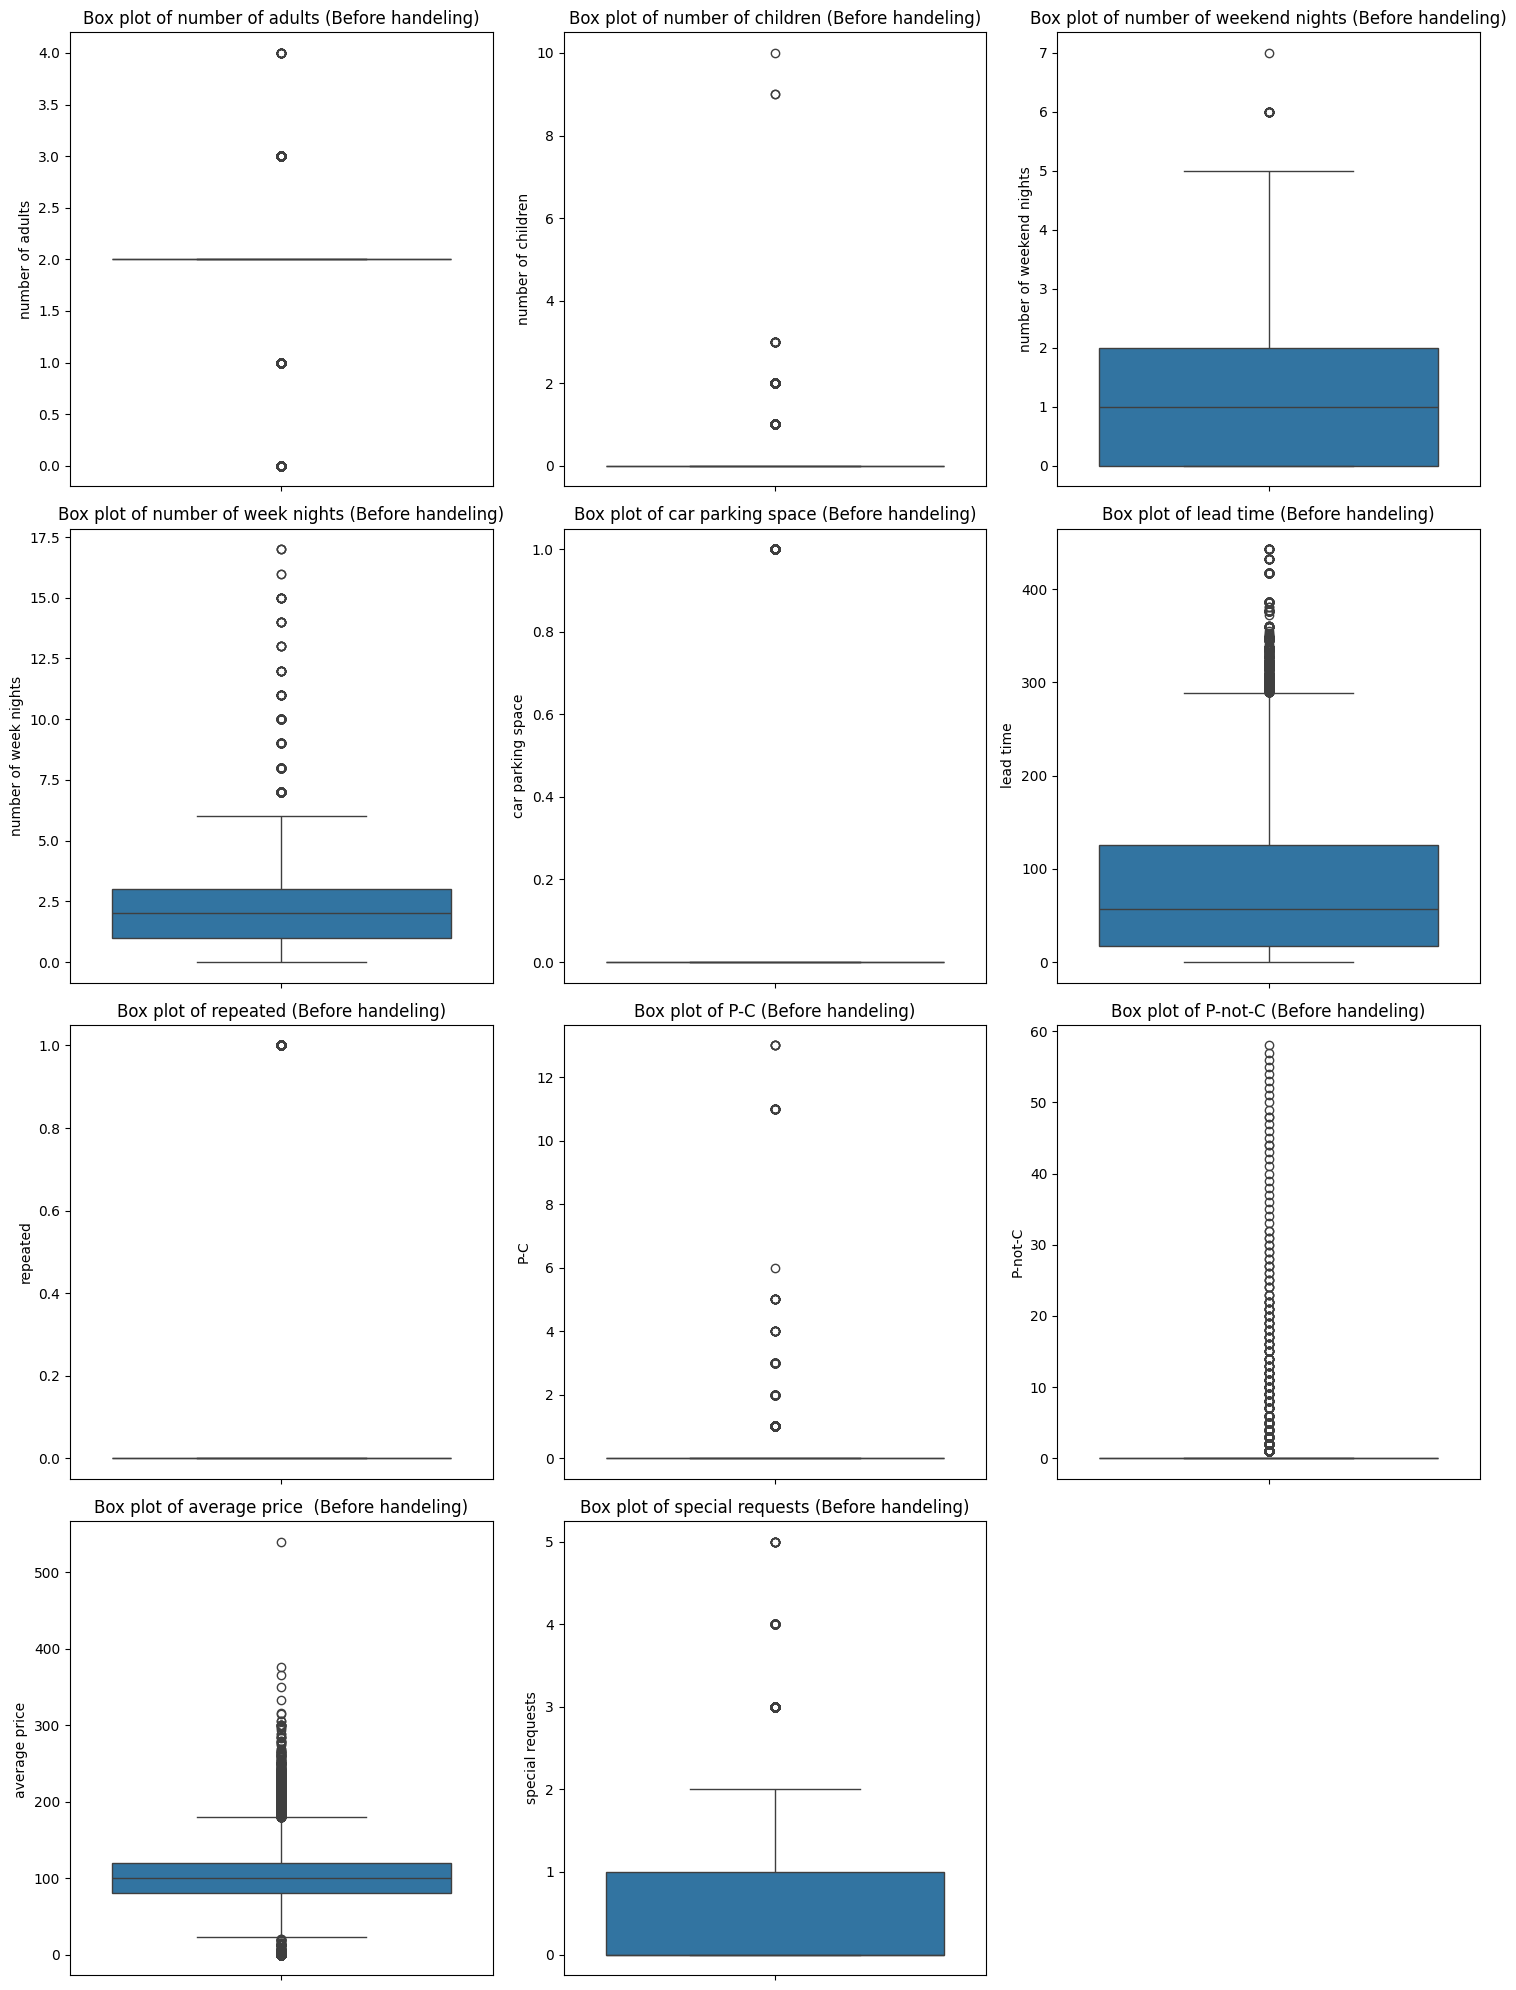

In [4]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Calculate the number of rows needed for the subplots
num_plots = len(numeric_cols)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

# Box plots for original data
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col} (Before handeling)')

plt.tight_layout()
plt.show()

# Removing Outliers

In [5]:
# List of columns to exclude from the z-score calculation
exclude_columns = ['P-C', 'P-not-C', 'repeated', 'car parking space', 'date of reservation' ,'booking status']

# Select only the columns to include in the z-score calculation
included_columns = data.select_dtypes(include=np.number).columns.difference(exclude_columns)

# Compute the z-scores for the included columns
z_scores = np.abs(stats.zscore(data[included_columns]))

# Filter the DataFrame to keep only the rows where all z-scores are less than 3
data_mod = data[(z_scores < 3).all(axis=1)]

# Print the data types of the modified DataFrame to verify
print(data_mod.dtypes)

number of adults                       int64
number of children                     int64
number of weekend nights               int64
number of week nights                  int64
car parking space                      int64
lead time                              int64
repeated                               int64
P-C                                    int64
P-not-C                                int64
average price                        float64
special requests                       int64
date of reservation                   object
booking status                        object
type of meal_Meal Plan 1                bool
type of meal_Meal Plan 2                bool
type of meal_Meal Plan 3                bool
type of meal_Not Selected               bool
room type_Room_Type 1                   bool
room type_Room_Type 2                   bool
room type_Room_Type 3                   bool
room type_Room_Type 4                   bool
room type_Room_Type 5                   bool
room type_

# Plotting data after removing outliers

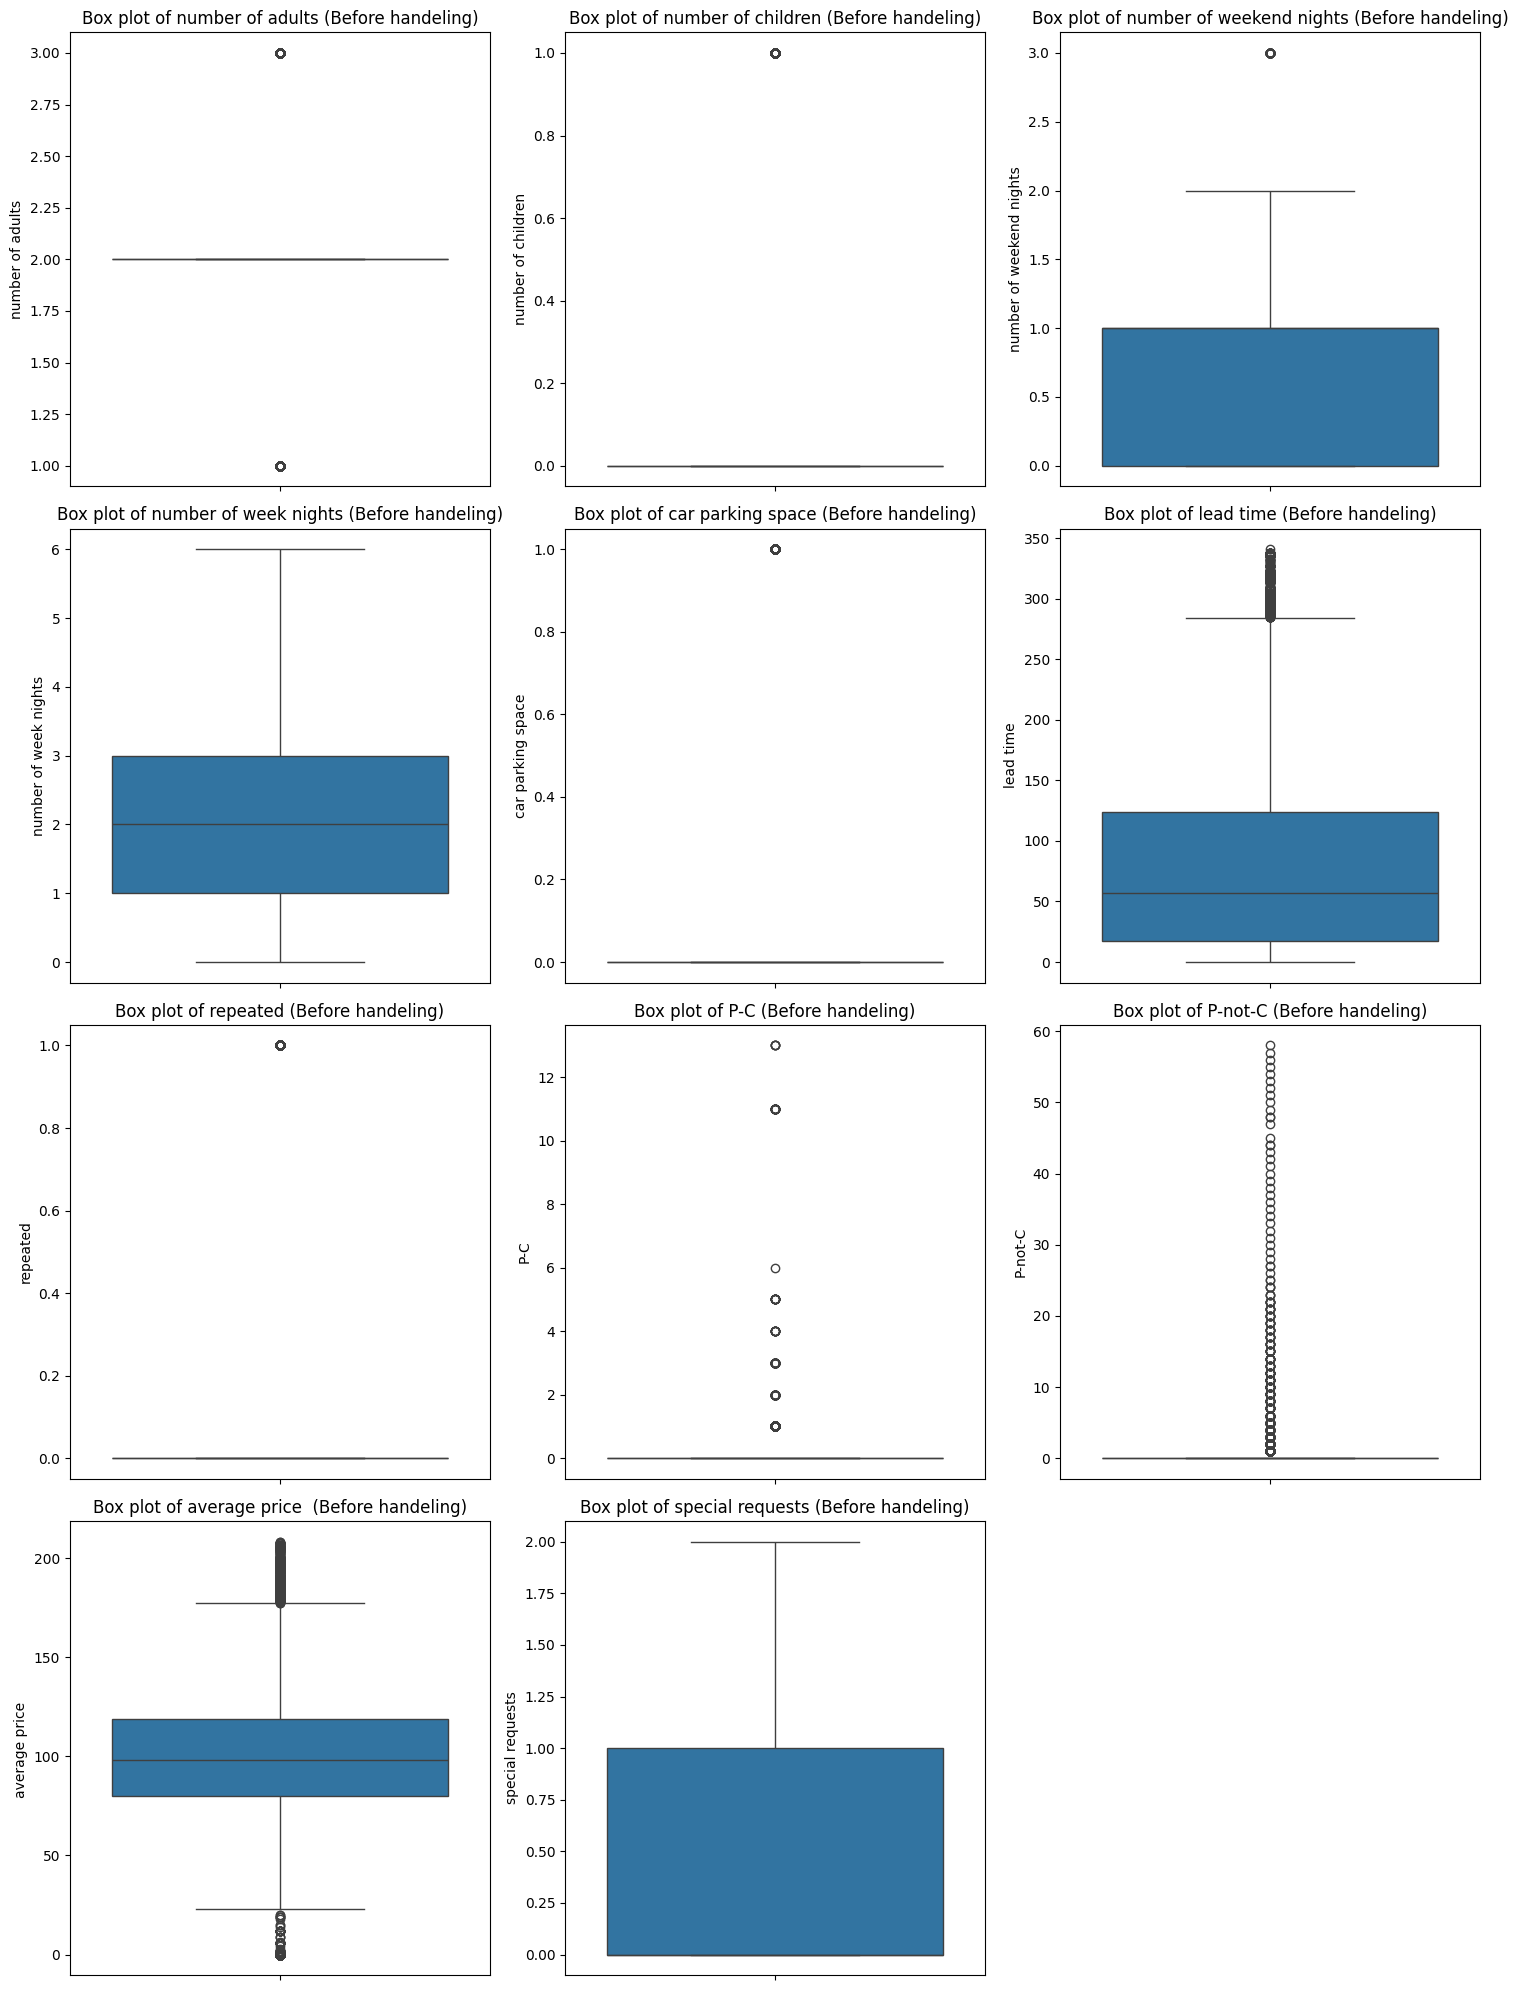

In [6]:
numeric_cols = data_mod.select_dtypes(include=[np.number]).columns

# Calculate the number of rows needed for the subplots
num_plots = len(numeric_cols)
num_cols = 3  # Number of columns for the subplot grid
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

# Box plots for original data
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data_mod[col])
    plt.title(f'Box plot of {col} (Before handeling)')

plt.tight_layout()
plt.show()

# Encoding date of reservation & Booking Status

In [7]:
# Date and Time Features
data_mod['date of reservation'] = pd.to_datetime(data_mod['date of reservation'],errors='coerce')
data_mod['year'] = data_mod['date of reservation'].dt.year.astype('Int64')
data_mod['month'] = data_mod['date of reservation'].dt.month.astype('Int64')
data_mod['day'] = data_mod['date of reservation'].dt.day.astype('Int64')

data_mod = data_mod.drop('date of reservation', axis=1)

# Convert booking status to binary
data_mod['booking status']=data_mod['booking status'].replace('Not_Canceled',0)
data_mod['booking status']=data_mod['booking status'].replace('Canceled',1)

data_mod.head()

C:\Users\Mohamed Hefny\AppData\Local\Temp\ipykernel_2576\1005783849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mod['date of reservation'] = pd.to_datetime(data_mod['date of reservation'],errors='coerce')
C:\Users\Mohamed Hefny\AppData\Local\Temp\ipykernel_2576\1005783849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mod['year'] = data_mod['date of reservation'].dt.year.astype('Int64')
C:\Users\Mohamed Hefny\AppData\Local\Temp\ipykernel_2576\1005783849.py:4: SettingWithCopyWarning: 


number of adults  number of children  number of weekend nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number of week nights  car parking space  lead time  repeated  P-C  \
0                      5                  0        224         0    0   
1                      3                  0          5         0    0   
2                      3                  0          1         0    0   
3                      2                  0        211         0    0   
4                      2                  0         48         0    0   

   P-not-C  average price   ...  room type_Room_Type 6  room type_Room_Type 7  \
0        0           88.00  ...                  False                  False   
1        0          106.68  ...                  False                  False   
2        0           50.00  ...                  False                  False   
3        0          100.00  ...                  False                  False   
4        0           77.00  ...                  False                  False   

   market segment type_Aviation  market segment type_Complementary  \
0                         False                              False   
1                         False                              False   
2                         False                              False   
3                         False                              False   
4                         False                              False   

   market segment type_Corporate  market segment type_Offline  \
0                          False                         True   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   market segment type_Online  year  month  day  
0                       False  2015     10    2  
1                        True  2018     11    6  
2                        True  2018      2   28  
3                        True  2017      5   20  
4                        True  2018      4   11  

[5 rows x 31 columns]

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
data_cleaned = data_mod.dropna()
data_final = data_cleaned.drop(columns=['booking status'])
y = data_cleaned['booking status']


# Split the data to 20% Test and 80% Train
X_train, X_test, y_train, y_test = train_test_split(data_final, y, test_size=0.2, random_state=42)



# check the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 26887
Testing set size: 6722


In [9]:
print(data_final.isnull().sum())

number of adults                     0
number of children                   0
number of weekend nights             0
number of week nights                0
car parking space                    0
lead time                            0
repeated                             0
P-C                                  0
P-not-C                              0
average price                        0
special requests                     0
type of meal_Meal Plan 1             0
type of meal_Meal Plan 2             0
type of meal_Meal Plan 3             0
type of meal_Not Selected            0
room type_Room_Type 1                0
room type_Room_Type 2                0
room type_Room_Type 3                0
room type_Room_Type 4                0
room type_Room_Type 5                0
room type_Room_Type 6                0
room type_Room_Type 7                0
market segment type_Aviation         0
market segment type_Complementary    0
market segment type_Corporate        0
market segment type_Offli

# **Modeling by Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

c:\Users\Mohamed Hefny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Calculating Accuracy

In [11]:
# Calculate accuracy for logistec regression
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4557
           1       0.73      0.61      0.66      2165

    accuracy                           0.80      6722
   macro avg       0.78      0.75      0.76      6722
weighted avg       0.80      0.80      0.80      6722

Confusion Matrix:
[[4080  477]
 [ 851 1314]]


# **Modeling by Random Forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the model
#hyper parameter: Random state , max depth , estimators
model = RandomForestClassifier(n_estimators=100,max_depth=100,random_state=50)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_predTrain=model.predict(X_train)



# Calculating Accuracy

In [13]:
# Calculate accuracy for random forest
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4557
           1       0.88      0.81      0.84      2165

    accuracy                           0.90      6722
   macro avg       0.89      0.88      0.89      6722
weighted avg       0.90      0.90      0.90      6722

Confusion Matrix:
[[4311  246]
 [ 414 1751]]


# Calculating Accuracy to Check Overfitting

In [14]:
# Calculate accuracy for random forest
accuracy = accuracy_score(y_train, y_predTrain)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_train, y_predTrain))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_predTrain))

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18253
           1       0.99      0.99      0.99      8634

    accuracy                           0.99     26887
   macro avg       0.99      0.99      0.99     26887
weighted avg       0.99      0.99      0.99     26887

Confusion Matrix:
[[18200    53]
 [  108  8526]]


# Export model as file.pkl

In [15]:
import pickle

# Save the trained model using pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# To load the model later
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)